#  DS 500: Assignment 2  #
# Alzheimer's Prediction #
19L1854 - Omar Farooq
## Data Description

In [1]:
# Libraries
import pandas as pd
import numpy as np
import missingno as mno
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
# Load training data
data = pd.read_csv('oasis_longitudinal.csv')
data.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


#### COLUMN DESCRIPTORS

| COL | FULL-FORMS |
| --- | --- | 
| EDUC | Years of education |
| SES | Socioeconomic Status |
| MMSE | Mini Mental State Examination |
| CDR | Clinical Dementia Rating |
| eTIV | Estimated Total Intracranial Volume |
| nWBV	| Normalize Whole Brain Volume |
| ASF | Atlas Scaling Factor |


In [3]:
data.shape

(373, 15)

In [4]:
data.describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,1.882038,595.104558,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,0.922843,635.485118,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,2.000000,873.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


In [5]:
data.dtypes

Subject ID     object
MRI ID         object
Group          object
Visit           int64
MR Delay        int64
M/F            object
Hand           object
Age             int64
EDUC            int64
SES           float64
MMSE          float64
CDR           float64
eTIV            int64
nWBV          float64
ASF           float64
dtype: object

# Data Wrangling

In [6]:
data.isnull().sum()

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

In [7]:
data.columns

Index(['Subject ID', 'MRI ID', 'Group', 'Visit', 'MR Delay', 'M/F', 'Hand',
       'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF'],
      dtype='object')

In [8]:
data = data.drop(columns=['Subject ID', 'MRI ID'])

In [9]:
col_list = [c for c in data.columns if data[c].dtype == 'object']
col_list

['Group', 'M/F', 'Hand']

In [10]:
# Make a copy of data
train_data = data.copy()

# Change data types of columns
for c in col_list:
    train_data[c] = train_data[c].astype('category')
    train_data[c] = train_data[c].cat.codes

In [11]:
# Compare Actual and Encoded labels
for c in col_list:
    print('column:', c)
    print(data[c].unique().tolist())
    print(train_data[c].unique().tolist(), '\n')


column: Group
['Nondemented', 'Demented', 'Converted']
[2, 1, 0] 

column: M/F
['M', 'F']
[1, 0] 

column: Hand
['R']
[0] 



In [12]:
data.head()

,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [13]:
train_data.head()

,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,2,1,0,1,0,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,2,2,457,1,0,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,1,1,0,1,0,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,1,2,560,1,0,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,1,3,1895,1,0,80,12,NaN,22.0,0.5,1698,0.701,1.034


#### COLUMN DESCRIPTORS

| COL | FULL-FORMS |
| --- | --- | 
| EDUC | Years of education |
| SES | Socioeconomic Status |
| MMSE | Mini Mental State Examination |
| CDR | Clinical Dementia Rating |
| eTIV | Estimated Total Intracranial Volume |
| nWBV	| Normalize Whole Brain Volume |
| ASF | Atlas Scaling Factor |

### Mini-Mental State Examination

The MMSE is a written test that can provide a method of monitoring deterioration over time. I however has poor sensitivity at detected mild/early dementia

In [14]:
cols = train_data.columns
cols

Index(['Group', 'Visit', 'MR Delay', 'M/F', 'Hand', 'Age', 'EDUC', 'SES',
       'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF'],
      dtype='object')

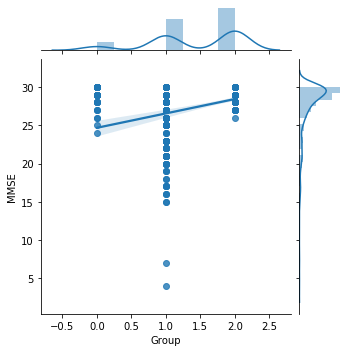

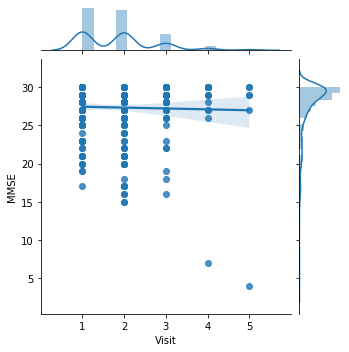

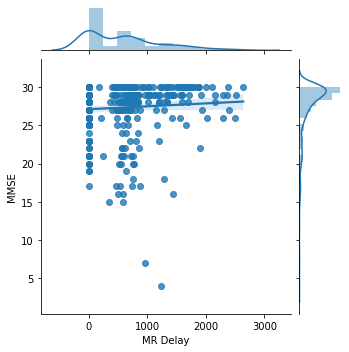

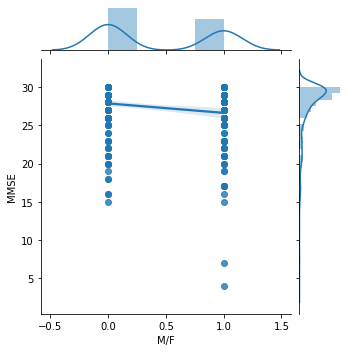

C:\Users\omarf\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


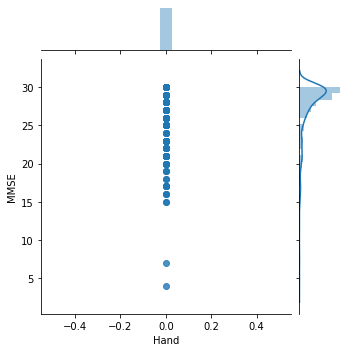

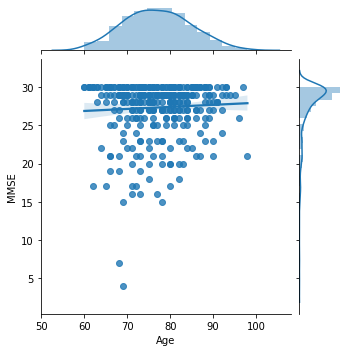

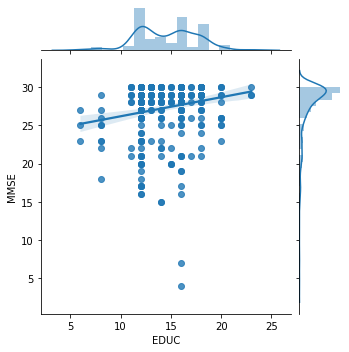

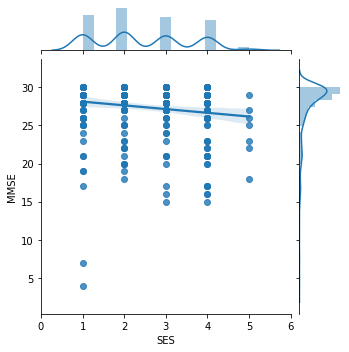

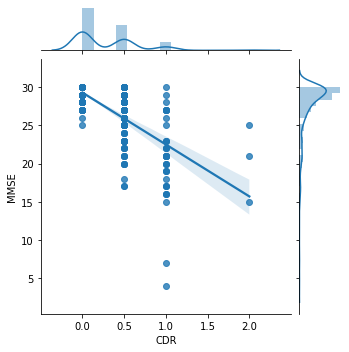

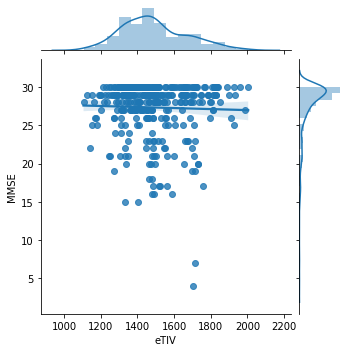

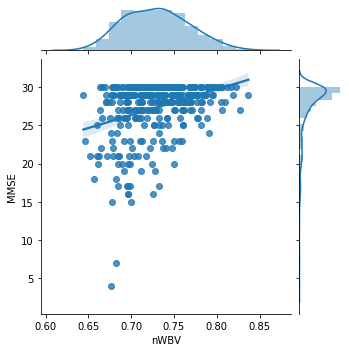

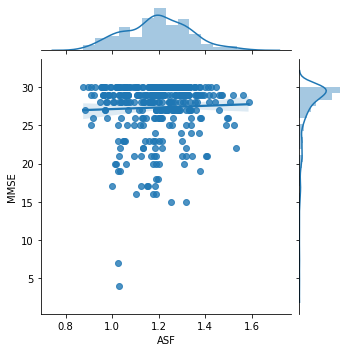

In [15]:
for c in cols:
    if(c != "MMSE"):
        sns.jointplot(x=c, y="MMSE", data=train_data, kind = 'reg', height =5)
        plt.show()

MMSE scores :
detoriate with age, 
increase with education levels,
detoriate with socio economic status,
are strongly negatively correlated with clinical dementia rating,
increase with brain volumes.

We see that MMSE scores are -vely skewed

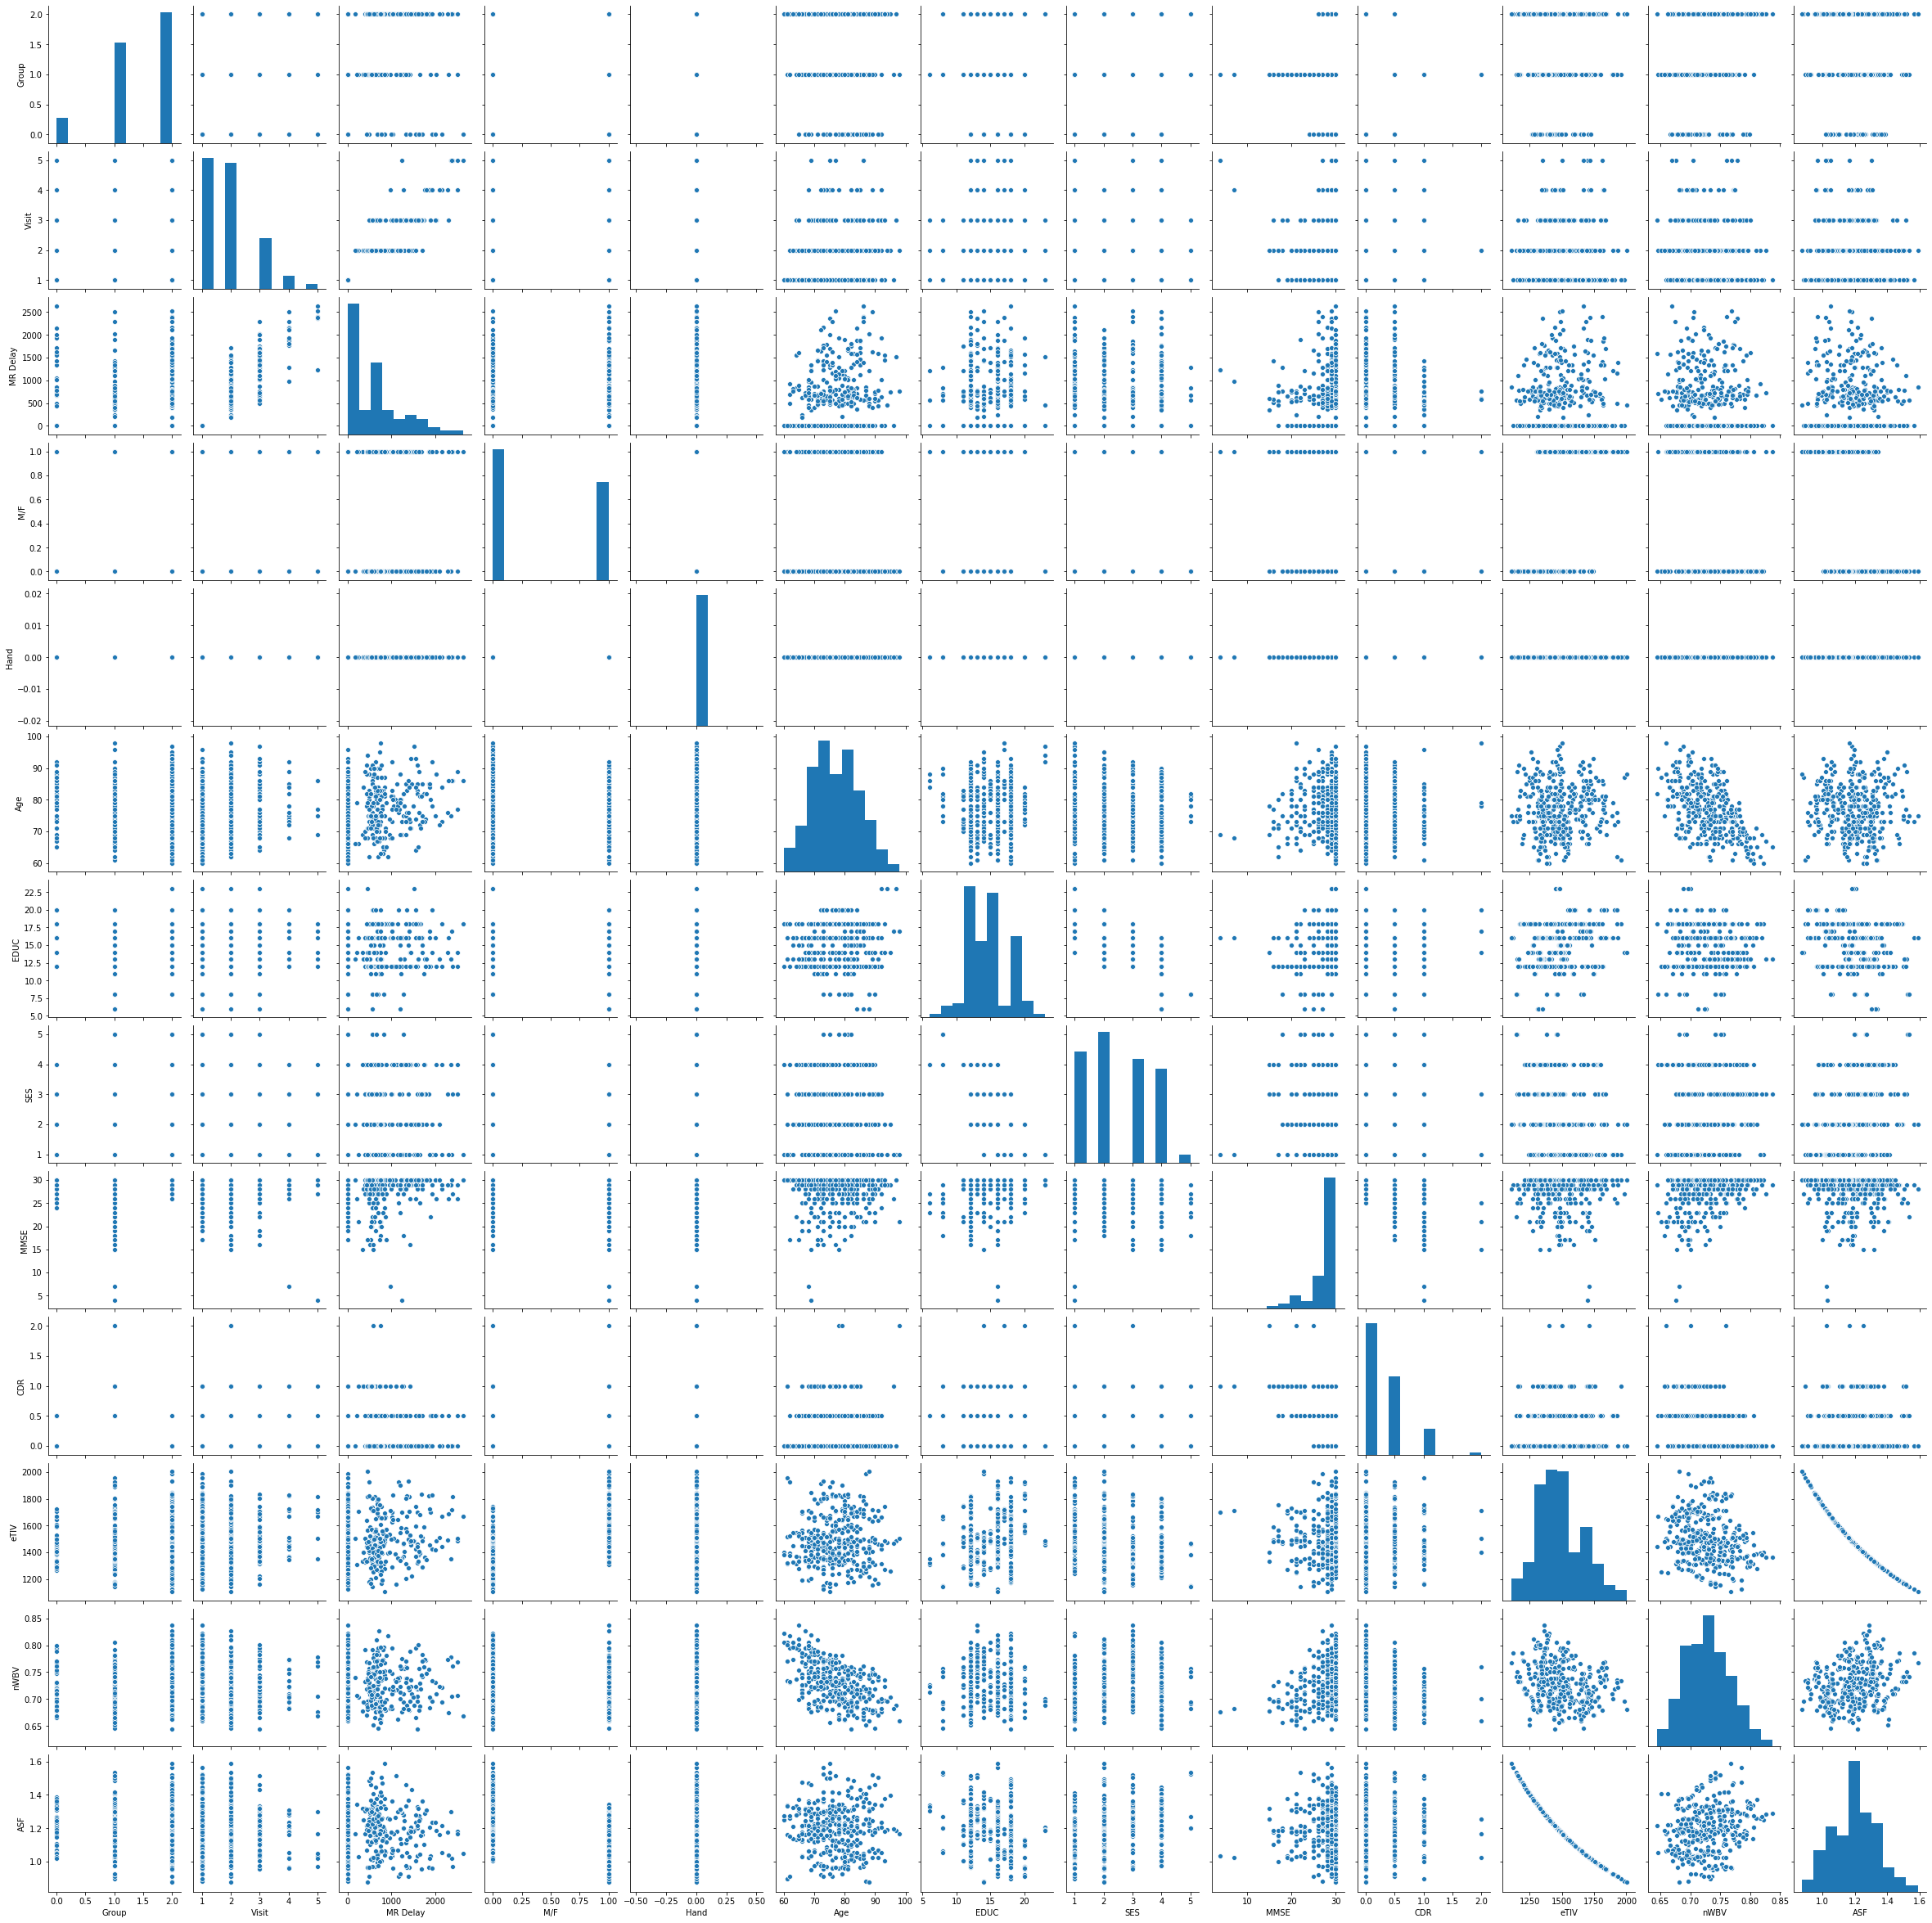

In [16]:
sns.pairplot(train_data)

In [17]:
#take mean for 2 missing vales of MMSE


for c in ['MMSE']:
    missing_vals = train_data[c].isnull().sum()
    observed_vals = train_data.loc[train_data[c].notnull(), c]
    train_data.loc[train_data[c].isnull(), c] = observed_vals.mean()

### Clinical Dementia Rating
The CDR is a 5-point scale used to characterize six domains of cognitive and functional performance applicable to Alzheimer disease and related dementias: Memory, Orientation, Judgment & Problem Solving, Community Affairs, Home & Hobbies, and Personal Care.

In [18]:
cols = data.columns

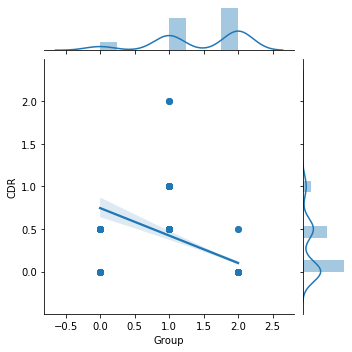

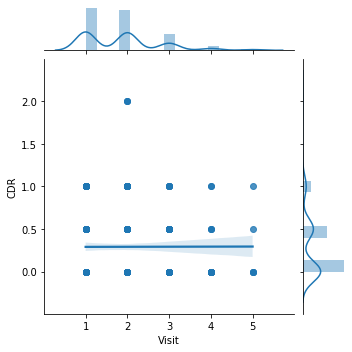

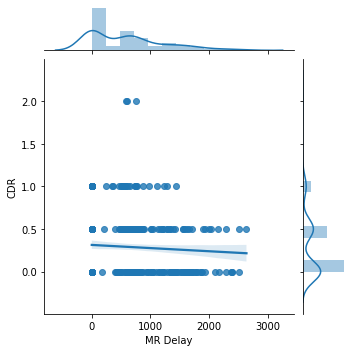

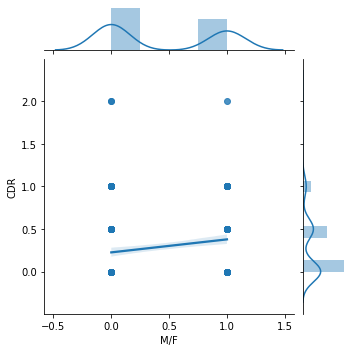

C:\Users\omarf\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


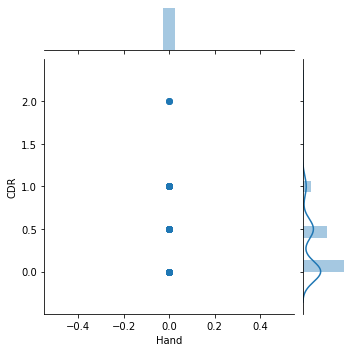

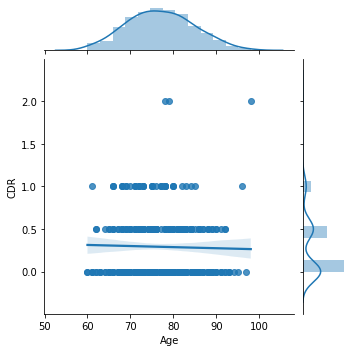

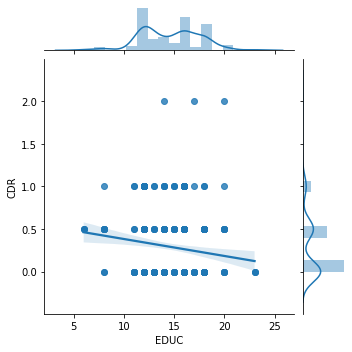

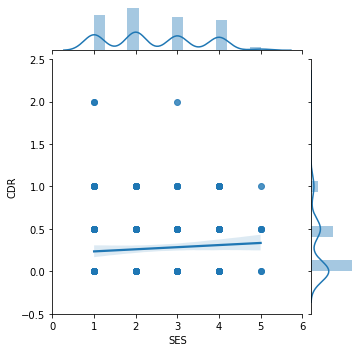

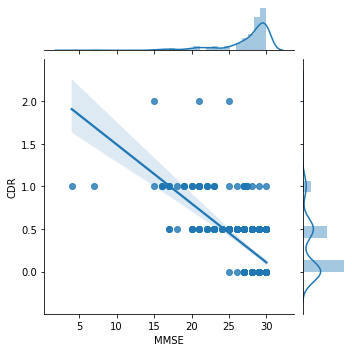

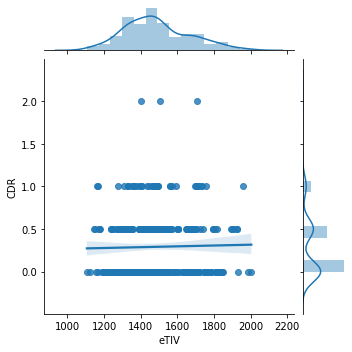

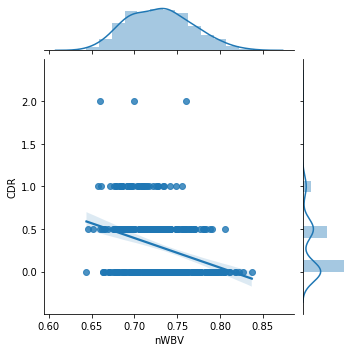

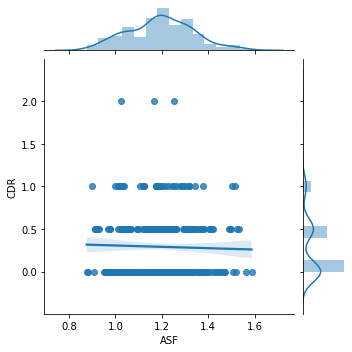

In [19]:
for c in cols:
    if(c != "CDR"):
        sns.jointplot(x=c, y="CDR", data=train_data, kind = 'reg', height =5)
        plt.show()

In [20]:
train_data.isnull().sum()

Group        0
Visit        0
MR Delay     0
M/F          0
Hand         0
Age          0
EDUC         0
SES         19
MMSE         0
CDR          0
eTIV         0
nWBV         0
ASF          0
dtype: int64

In [31]:
from sklearn import linear_model
# Regression to impute missing values in CDR

X = train_data.loc[train_data['SES'].notnull(), ['Group', 'Visit', 'MR Delay', 'M/F', 'Hand', 'Age', 'EDUC', 
                                                 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF']]
y = train_data.loc[train_data['SES'].notnull(), 'SES']
#X = X.drop(columns=['CDR'])
print(X.shape, y.shape)

(354, 12) (354,)


In [32]:
model = linear_model.LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
X_miss = train_data.loc[train_data['SES'].isnull(), ['Group', 'Visit', 'MR Delay', 'M/F', 'Hand', 'Age', 'EDUC', 'SES',
                                                     'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF']]
X_miss = X_miss.drop(columns = ['SES'])

print(X_miss.shape)

(19, 12)


In [34]:
train_data.loc[train_data['SES'].isnull(), 'SES'] = model.predict(X_miss)

In [35]:
train_data.isnull().sum()

Group       0
Visit       0
MR Delay    0
M/F         0
Hand        0
Age         0
EDUC        0
SES         0
MMSE        0
CDR         0
eTIV        0
nWBV        0
ASF         0
dtype: int64

# Attribute Selection

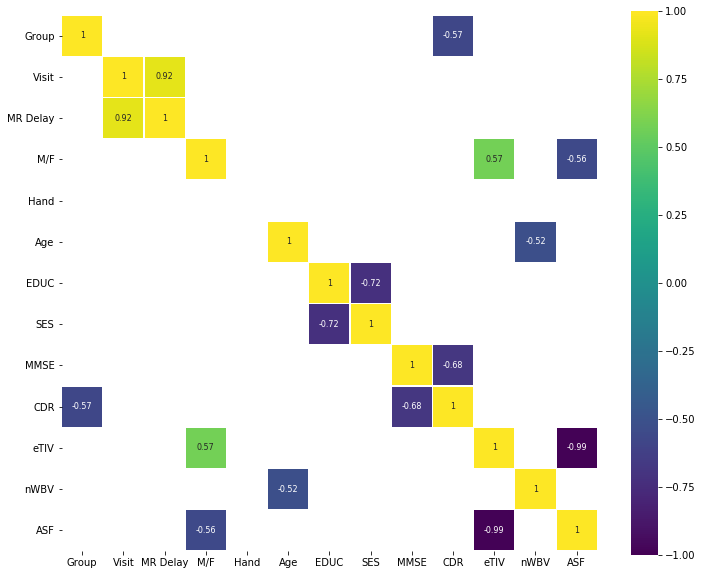

In [23]:
# Correlation heatmap
corr = train_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr[(corr >= 0.4) | (corr <= -0.4)],
cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
annot=True, annot_kws={"size": 8}, square=True)

# Model Training

In [44]:
# Standardize data
from sklearn.preprocessing import StandardScaler
# Columns not to be standardized. These are columns with categorical data,
# also we don't standardize our target vraiable
cols = ['Group',  'M/F', 'Hand', 'EDUC', 'SES']
# Pick remaining columns and standardize them
columns = [c for c in train_data.columns if c not in cols]
scaler = StandardScaler()
scaler.fit(train_data[columns])
train_data[columns] = scaler.transform(train_data[columns])


In [45]:
# Train Test Split
from sklearn.model_selection import train_test_split
y = train_data['Group']
X = train_data.drop(columns=['Group'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print("Training Set Dimensions:", X_train.shape)
print("Validation Set Dimensions:", X_test.shape)


Training Set Dimensions: (298, 12)
Validation Set Dimensions: (75, 12)


In [46]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)
print("Testing Accuracy:", model.score(X_test, y_test))
print("Training Accuracy:", model.score(X_train, y_train))

Testing Accuracy: 0.9466666666666667
Training Accuracy: 1.0


Text(69.0, 0.5, 'Truth')

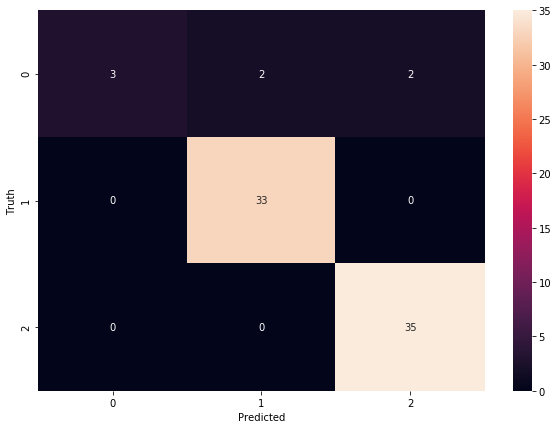

In [47]:
y_predicted = model.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Accuracy Sore comparison

|Score|Model|Source|
|---|---|---|
| 0.88 | Random Forest | https://www.kaggle.com/ruslankl/dementia-prediction-w-tree-based-models |
| 0.91 | GBM | https://www.kaggle.com/ruslankl/dementia-prediction-w-tree-based-models |
| 0.83 | Decision Tree Model | https://www.kaggle.com/ruslankl/dementia-prediction-w-tree-based-models |
| 89.5 | Random Forest | http://journal.iasa.kpi.ua/issue/viewFile/10560/4885#page=25 |
| 88 | Support Vector Machine | http://journal.iasa.kpi.ua/issue/viewFile/10560/4885#page=25 |
|89| Stacking: Gradient Boosting + ANN |https://sci-hub.do/10.1109/icces48766.2020.9137852 |


In [51]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [52]:
y_pred = classifier.predict(X_test)

In [53]:
print("Testing Accuracy:", classifier.score(X_test, y_test))
print("Training Accuracy:", classifier.score(X_train, y_train))

Testing Accuracy: 0.9066666666666666
Training Accuracy: 0.9194630872483222


In [54]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [55]:
print("Testing Accuracy:", classifier.score(X_test, y_test))
print("Training Accuracy:", classifier.score(X_train, y_train))

Testing Accuracy: 0.9066666666666666
Training Accuracy: 0.8758389261744967


# Optimizing Random forest classifier

In [72]:
n_estimators = [int(x) for x in np.linspace(start=60, stop = 160, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [12,14, 18, 32]
min_samples_split= [2, 5]
min_samples_leaf = [1, 2]
bootstrap = [True, False]


In [73]:
param_grid = {'n_estimators': n_estimators,
             'max_features': max_features,
             'max_depth': max_depth,
             'min_samples_split': min_samples_split,
             'min_samples_leaf': min_samples_leaf,
             'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [60, 71, 82, 93, 104, 115, 126, 137, 148, 160], 'max_features': ['auto', 'sqrt'], 'max_depth': [12, 14, 18, 32], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [74]:
rf_Model = RandomForestClassifier()

In [75]:
from sklearn.model_selection import GridSearchCV
rf_Grid = GridSearchCV(estimator = rf_Model, param_grid = param_grid, cv = 3, verbose=2, n_jobs = 4)

In [76]:
rf_Grid.fit(X_train, y_train)

Fitting 3 folds for each of 640 candidates, totalling 1920 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    3.3s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:   15.6s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:   36.4s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:  1.1min
[Parallel(n_jobs=4)]: Done 1005 tasks      | elapsed:  1.7min
[Parallel(n_jobs=4)]: Done 1450 tasks      | elapsed:  2.3min
[Parallel(n_jobs=4)]: Done 1920 out of 1920 | elapsed:  2.9min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              random_state=None, verbose=0,
                                   

In [77]:
rf_Grid.best_params_

{'bootstrap': False,
 'max_depth': 32,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 126}

In [78]:
print("Training Accuracy:", rf_Grid.score(X_train,y_train))
print("Testing Accuracy:", rf_Grid.score(X_test,y_test))

Training Accuracy: 1.0
Testing Accuracy: 0.9333333333333333
